# Logistic regression

Based on this [blog post](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a) and this [video](https://www.youtube.com/watch?v=71iXeuKFcQM). About multiclass regression and confusion matrices.

### Loading the Data (Digits Dataset) 

In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


### Showing the Images and Labels

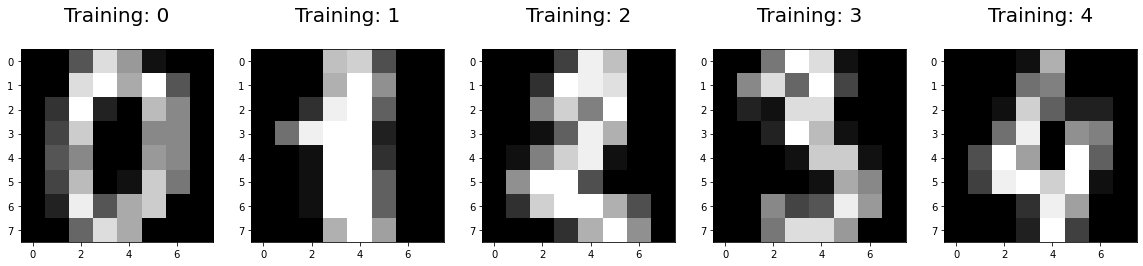

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Splitting the Data into Training and Test Sets 

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

### Scikit-learn modeling in four steps 

**Step 1.** Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [5]:
from sklearn.linear_model import LogisticRegression

**Step 2.** Make an instance of the Model (with multiclass option "one-versus-the-rest" and a solver called liblinear) 

In [6]:
logisticRegr = LogisticRegression(multi_class='ovr', solver='liblinear')

**Step 3.** Train the model on the data, storing the information learned from the data

In [7]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

**Step 4.** Predict the labels of new data (new images)

In [8]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [9]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [10]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

### Measuring Accuracy

We are going to see how the model performs on the new data (test set). Recall that accuracy = correct predictions / total number of data points.

In [11]:
# Use the score method to get the accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


### Plotting a Confusion Matrix 

A confusion matrix is a table that describes the performance of a classifier on a set of test data for which the true values are known.

In [12]:
import numpy as np 
import seaborn as sns #seaborn is a package for nice-looking graphics
from sklearn import metrics

In [13]:
cm = metrics.confusion_matrix(y_test, predictions)

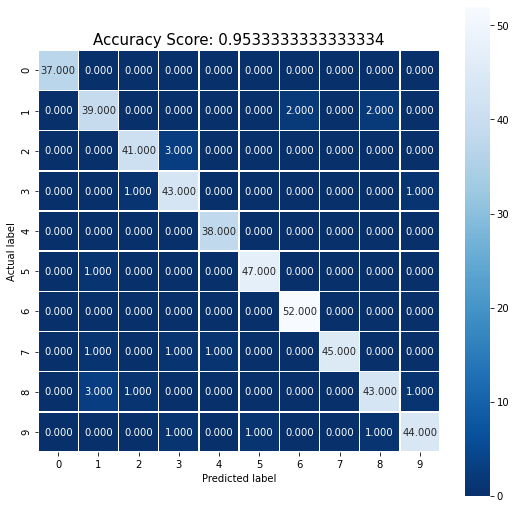

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();


For instance, here we can see that some digits that were intended to be 8s were misclassified as 1s.